# TASK 7 - Stock Market Prediction using Numerical and Textual Analysis
Stock to analyze and predict SENSEX (S&P BSE SENSEX)

## Objective:
```
● Stock to analyze and predict SENSEX (S&P BSE SENSEX)
● Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.
```

### Level - Advanced
### Author - Karan Doke

● Download historical stock prices from https://finance.yahoo.com/       
● Download textual(news) data from https://bit.ly/36fFPI6

### Importing all the libraries required for analysis

In [319]:
bse_data = pdr.get_data_yahoo('^BSESN',start='2015-01-01', end='2019-09-03')
#since our Textual Analysis dataset containing news from Times of India News Headlines is only till 3rd September 2019. 
#So we will assume today is 2nd September 2019 and tomorrow is 3rd September 2019. And we have to predict the stock price ((high+low+close)/3) and closing price of BSE index
#for tomorrow 3rd September 2019
unseenbse_data = pdr.get_data_yahoo('^BSESN',start='2019-09-03', end='2019-10-03')

In [320]:
bse_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [321]:
bse_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-27,37731.511719,37449.691406,37658.480469,37641.269531,36500.0,37641.269531
2019-08-28,37687.820312,37249.191406,37655.769531,37451.839844,28600.0,37451.839844
2019-08-29,37381.800781,36987.351562,37381.800781,37068.929688,31700.0,37068.929688
2019-08-30,37397.968750,36829.808594,37222.261719,37332.789062,33400.0,37332.789062
2019-09-03,37188.378906,36466.011719,37181.761719,36562.910156,23600.0,36562.910156


In [322]:
unseenbse_data.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,37188.378906,36466.011719,37181.761719,36562.910156,23600,36562.910156
2019-09-04,36776.308594,36409.539062,36575.238281,36724.738281,25600,36724.738281


In [323]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1147 entries, 2015-01-02 to 2019-09-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1147 non-null   float64
 1   Low        1147 non-null   float64
 2   Open       1147 non-null   float64
 3   Close      1147 non-null   float64
 4   Volume     1147 non-null   float64
 5   Adj Close  1147 non-null   float64
dtypes: float64(6)
memory usage: 62.7 KB


In [324]:
#before moving forward let us calculate first the actual price
unseenbsedata_price = round((unseenbse_data['High'] + unseenbse_data['Low'] + unseenbse_data['Close'])/3,2)
unseenbsedata_price  #actual price

Date
2019-09-03    36739.10
2019-09-04    36636.86
2019-09-05    36695.10
2019-09-06    36907.47
2019-09-09    37058.00
2019-09-11    37269.28
2019-09-12    37196.03
2019-09-13    37266.19
2019-09-16    37151.44
2019-09-17    36689.91
2019-09-18    36580.93
2019-09-19    36231.73
2019-09-20    37492.79
2019-09-23    39068.40
2019-09-24    39105.52
2019-09-25    38730.56
2019-09-26    38941.31
2019-09-27    38904.18
2019-09-30    38647.18
2019-10-01    38386.36
2019-10-03    38125.12
dtype: float64

## Simple Moving Average

<AxesSubplot:>

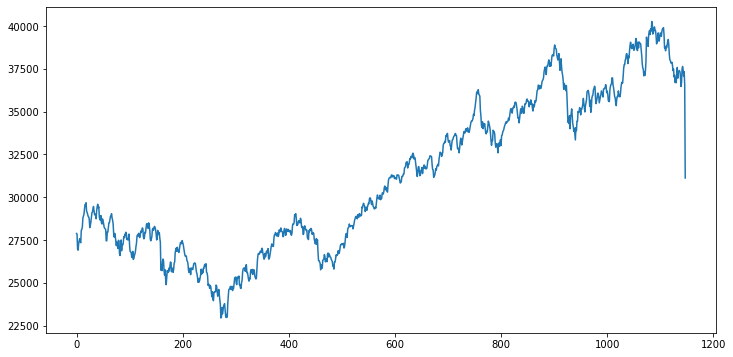

In [346]:
bse_data['Close'].plot(figsize=(12,6))

## Rolling window analysis of time series
### Creating 10,30, 50 Days Rolling Moving Average of closing price of BSE index

In [347]:
bse_data['Close:10 days rolling average']=bse_data['Close'].rolling(window=10,min_periods=1).mean()

In [348]:
bse_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,Close:10 days rolling average
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,0.055586,0.455251,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,0.100081,0.433132,27865.110352
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,0.055802,0.386579,27572.560547
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,0.034707,0.386916,27406.625488
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,0.060173,0.408416,27380.242578


<AxesSubplot:>

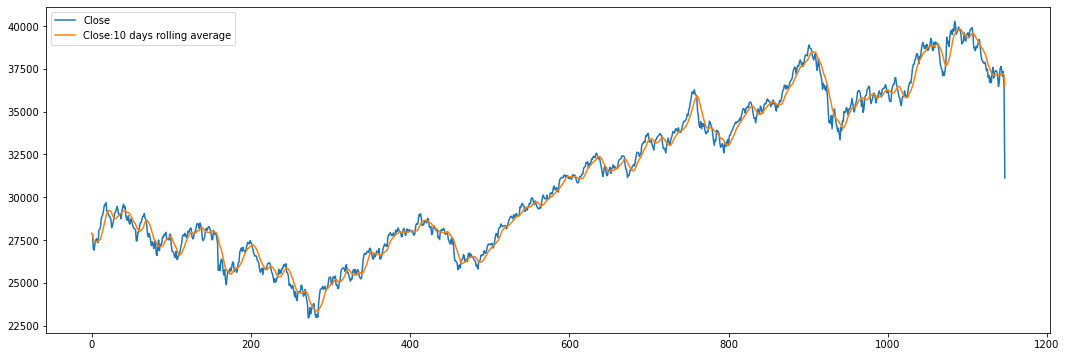

In [349]:
bse_data[['Close','Close:10 days rolling average']].plot(figsize=(18,6))

In [350]:
bse_data['Close:30 days rolling average']=bse_data['Close'].rolling(window=30,min_periods=1).mean()
bse_data['Close:50 days rolling average']=bse_data['Close'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:>

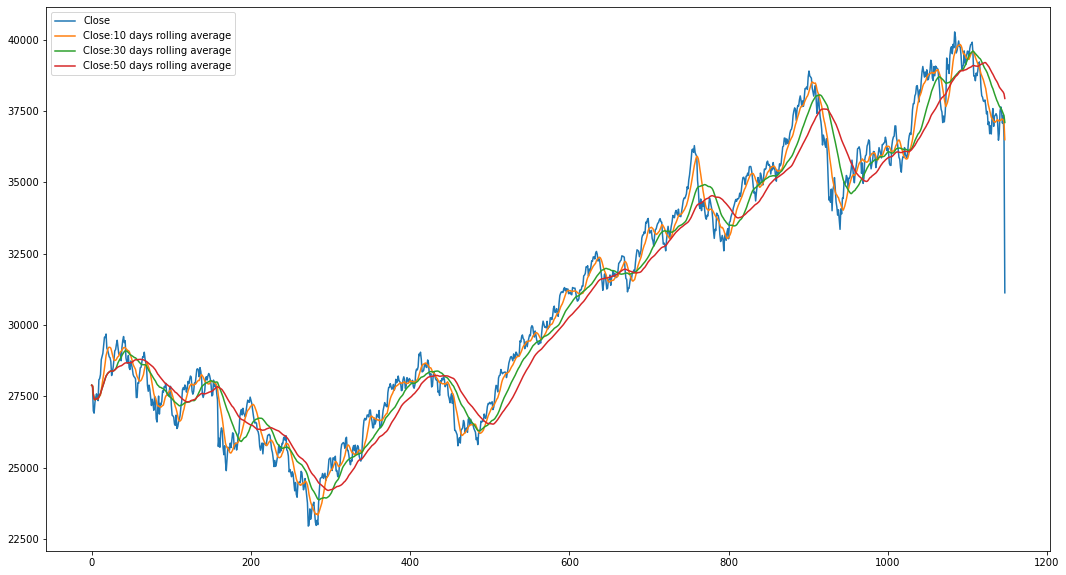

In [351]:
bse_data[['Close','Close:10 days rolling average','Close:30 days rolling average','Close:50 days rolling average']].plot(figsize=(18,10))

## Cummulative Moving Average

<AxesSubplot:>

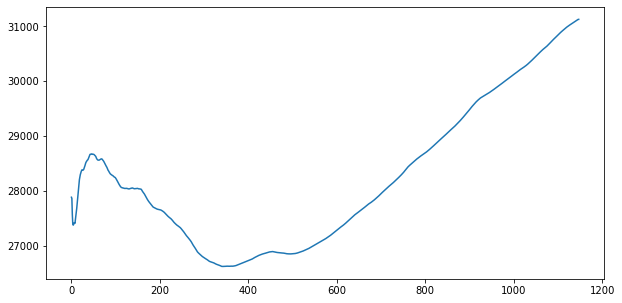

In [352]:
bse_data['Close'].expanding().mean().plot(figsize=(10,5))

## Exponential moving average (EMA)

In [353]:
# Let's smoothing factor - 0.1
bse_data['EMA_0.1']=bse_data['Close'].ewm(alpha=0.1,adjust=False).mean()

In [354]:
# Let's smoothing factor - 0.3
bse_data['EMA_0.3']=bse_data['Close'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:>

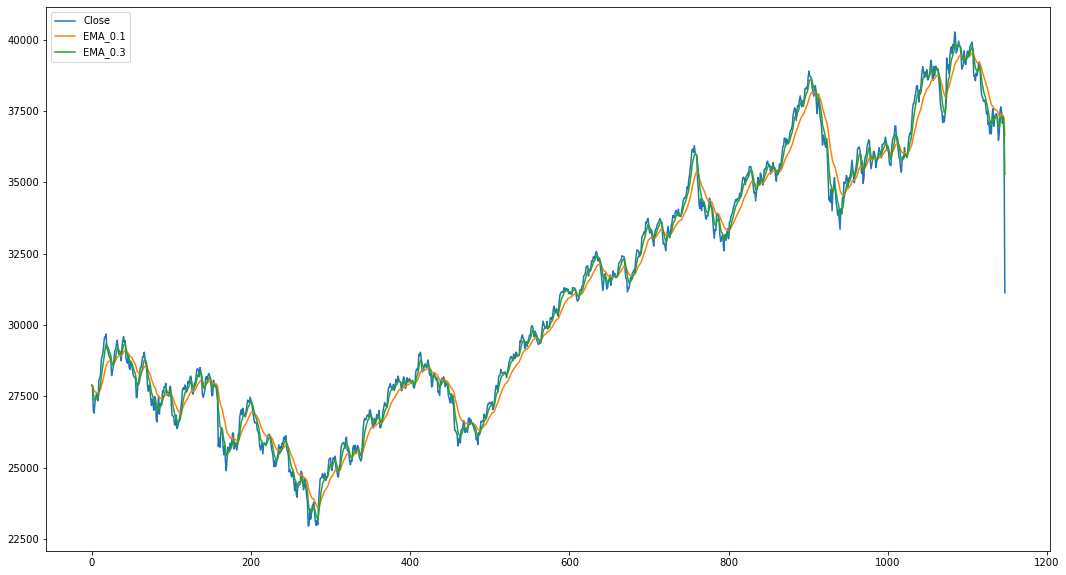

In [355]:
bse_data[['Close','EMA_0.1','EMA_0.3']].plot(figsize=(18,10))

In [356]:
bse_data.reset_index(inplace=True)

In [357]:
bse_data.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,Close:10 days rolling average,Close:30 days rolling average,Close:50 days rolling average,EMA_0.1,EMA_0.3
0,0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,0.055586,0.455251,27887.900391,27887.900391,27887.900391,27887.900391,27887.900391
1,1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,0.100081,0.433132,27865.110352,27865.110352,27865.110352,27883.342383,27874.226367
2,2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,0.055802,0.386579,27572.560547,27572.560547,27572.560547,27793.754238,27608.196738
3,3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,0.034707,0.386916,27406.625488,27406.625488,27406.625488,27705.260846,27398.383811
4,4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,0.060173,0.408416,27380.242578,27380.242578,27380.242578,27662.205855,27361.281949


In [358]:
unseenbse_data.reset_index(inplace=True)

In [359]:
unseenbse_data.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2019-09-03,37188.378906,36466.011719,37181.761719,36562.910156,23600,36562.910156
1,1,2019-09-04,36776.308594,36409.539062,36575.238281,36724.738281,25600,36724.738281
2,2,2019-09-05,36898.988281,36541.878906,36821.710938,36644.421875,27400,36644.421875
3,3,2019-09-06,37012.980469,36727.660156,36785.589844,36981.769531,23000,36981.769531
4,4,2019-09-09,37244.078125,36784.468750,36969.480469,37145.449219,25300,37145.449219


# Textual Analysis of news from Times of India News Headlines

In [95]:
#reading the uploaded csv file and assigning to news variable

news = pd.read_csv('india-news-headlines.csv',engine='python', error_bad_lines=False) 

Skipping line 3181666: unexpected end of data


In [96]:
#getting the overview of all the columns in the news dataset
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [97]:
#finding the total rows and columns of news dataset
news.shape

(3181664, 3)

In [99]:
#first 5 rows content of the dataset
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [100]:
#converting publish_date column to 
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [101]:
#first 5 rows content of the dataset
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [102]:
#last 5 rows content of the dataset
news.tail()

,publish_date,headline_category,headline_text
3181659,2019-09-03,city.rajkot,Kutch varsity's chemistry department to help d...
3181660,2019-09-03,city.rajkot,SOMA asks PM Modi to curb import of edible oil
3181661,2019-09-03,city.rajkot,Rain pounds Kutch; Saurashtra; Rajkot gets 209...
3181662,2019-09-03,city.bhopal,Shivraj brings 'bhajan sandhyas' on train trip
3181663,2019-09-03,city.surat,Model on Surat fire tragedy makes it to Ganesh...


In [103]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181664 entries, 0 to 3181663
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 72.8+ MB


In [104]:
#finding unique values in headline_category
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india',
       'city.bengaluru', 'city.patna', 'business.india-business',
       'entertainment.english.hollywood', 'city.delhi', 'edit-page',
       'only-in-america', 'city.ahmedabad', 'jugular-vein', 'swaminomics',
       'city.thiruvananthapuram', 'city.pune', 'home.science',
       'city.mumbai', 'city.chandigarh', 'city.lucknow', 'city.kolkata',
       'city.hyderabad', 'cricket', 'business.international-business',
       'city', 'removed', 'home.sunday-times.deep-focus', 'bombay-times',
       'home.sunday-times.all-that-matters', 'home.education',
       'pune-times', 'calcutta-times', 'hyderabad-times',
       'bangalore-times', 'lucknow-times', 'delhi-times',
       'ahmedabad-times', 'citizens-grievances', 'anti-terror-law',
       'hyderabad.local-sports', 'home.sunday-times', 'food-facts',
       'recipes', 'business', 'ayodhya-imbroglio', 'afghan-children',
       'sino-indian-ties', 'news', 'analysis', 'interviews',
   

In [105]:
#checking all the values count (unique values total count)
news['headline_category'].value_counts()

india                                   279251
unknown                                 209582
city.mumbai                             129247
city.delhi                              118810
business.india-business                 111391
                                         ...  
life-style.parenting.ask-the-expert          2
world.us.india-and-us                        2
world.us.us-and-world                        1
world.us.gun-violence-and-crimes             1
sports.cricket.south-africa-in-india         1
Name: headline_category, Length: 997, dtype: int64

In [106]:
#total unique values count
news['headline_category'].value_counts().count()

997

In [107]:
#checking all the values count (unique values total count)
news['headline_text'].value_counts()

Straight Answers                                     6723
Cartoons                                             1536
Straight answers                                     1500
Photogallery                                         1353
Your say                                             1012
                                                     ... 
Footpaths Captured By Illegal Manner                    1
Meet on Darwinism concludes in Dharwad                  1
Day curfew lifted from Gonda                            1
UP CM Yogi Adityanath to campaign on April 19; 20       1
Record 3;573 get screened at TOI diabetes camp          1
Name: headline_text, Length: 2937748, dtype: int64

In [108]:
#total unique values count
news['headline_text'].value_counts().count()

2937748

In [109]:
#finding if any null values are present
news.isnull().sum().sum()

0

In [110]:
#finding if any duplicate values are present
news.duplicated().sum()

23542

In [111]:
#rough checking by marking all duplicates as True. Default is first which marks duplicates as True except for the first occurrence.
news.duplicated(keep=False).sum()

44871

In [112]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [113]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3181502,2019-09-02,home.education,GATE 2020 application process begins; register...
3181504,2019-09-02,home.education,JEE Main January 2020 registration process beg...
3181505,2019-09-02,home.education,JEE Main January 2020 registration process beg...
3181585,2019-09-02,tv.news.tamil,its all upside down not everything meets the e...


In [114]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [115]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [116]:
pip install -U textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [117]:
from textblob import TextBlob

In [118]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [119]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [121]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [122]:
newsdf

,publish_date,headline_text
0,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
1,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...
...,...,...
6772,2001-06-05,Darkness Triumphs
6773,2001-06-04,Aamir Khan: The taxman cometh!
6774,2001-03-02,Such A Long Journey
6775,2001-03-17,Crouching Tiger; Hidden Dragon


In [123]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [124]:
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [125]:
newsdf.tail()

,publish_date,headline_text
6772,2019-08-30,Horoscope Today; August 30; 2019: Check astrol...
6773,2019-08-31,Horoscope Today; 31 August 2019: Check astrolo...
6774,2019-09-01,Horoscope Today; September 1; 2019: Check astr...
6775,2019-09-02,49 lakh filings on August 31 push I-T returns ...
6776,2019-09-03,Agra varsity yet to complete admission process...


In [126]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   6777 non-null   datetime64[ns]
 1   headline_text  6777 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 106.0+ KB


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it ia=s equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [127]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [128]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [130]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [131]:
newsdf.tail()

,publish_date,headline_text,polarity,subjectivity
6772,2019-08-30,Horoscope Today; August 30; 2019: Check astrol...,0.080405,0.422081
6773,2019-08-31,Horoscope Today; 31 August 2019: Check astrolo...,0.065598,0.410469
6774,2019-09-01,Horoscope Today; September 1; 2019: Check astr...,0.042932,0.435742
6775,2019-09-02,49 lakh filings on August 31 push I-T returns ...,0.081774,0.406024
6776,2019-09-03,Agra varsity yet to complete admission process...,0.100291,0.342424


In [329]:
#finding if any null values are present
newsdf.isnull().sum().sum()

0

In [330]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'Date'}, inplace = True)

In [331]:
#selecting required columns
newsdf = newsdf.filter(['Date', 'polarity', 'subjectivity'], axis=1)

In [332]:
newsdf.shape

(6777, 3)

In [333]:
newsdf['Date'].duplicated().sum()

0

In [334]:
bse_data.shape

(1147, 7)

In [335]:
bse_data['Date'].duplicated().sum()

0

In [336]:
bse_data = pd.merge(bse_data, newsdf, how='left', on=['Date'])

In [337]:
bse_data.shape

(1147, 9)

In [338]:
bse_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,0.055586,0.455251
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,0.100081,0.433132
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,0.055802,0.386579
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,0.034707,0.386916
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,0.060173,0.408416


In [339]:
bse_data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity
1142,2019-08-27,37731.511719,37449.691406,37658.480469,37641.269531,36500.0,37641.269531,0.065945,0.401510
1143,2019-08-28,37687.820312,37249.191406,37655.769531,37451.839844,28600.0,37451.839844,0.070071,0.426166
1144,2019-08-29,37381.800781,36987.351562,37381.800781,37068.929688,31700.0,37068.929688,0.022432,0.441679
1145,2019-08-30,37397.968750,36829.808594,37222.261719,37332.789062,33400.0,37332.789062,0.080405,0.422081
1146,2019-09-03,37188.378906,36466.011719,37181.761719,36562.910156,23600.0,36562.910156,0.100291,0.342424


In [340]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [341]:
bse_data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'polarity', 'subjectivity'],
      dtype='object')

# Preparing the dataset for machine learning

In [342]:
#adding new row for 3 september 2019 (price to be predicted of this day) to main dataset to get average values of all the columns for this day
#taking average because we don't know the values of all the columns for tomorrow so to predict we need average for independent variable.
#We will separate this row later from this main dataset so we can use this as prediction of unseen data for tomorrow. 
#And then tally it with actual data from unseenbse_data dataset which we have downloaded too for 3 september 2019 actual values
bse_data.loc[len(bse_data)] = ['2019-09-03', bse_data['Open'].mean(), bse_data['High'].mean(), bse_data['Low'].mean(),
                               bse_data['Close'].mean(), bse_data['Adj Close'].mean(), bse_data['Volume'].median(), bse_data['polarity'].mean(), bse_data['subjectivity'].mean()]

In [368]:
#converting date from object dtype to datetime dtype
bse_data['Date'] = pd.to_datetime(bse_data['Date'], format="%Y-%m-%d")

In [344]:
bse_data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity
1143,2019-08-28,37687.820312,37249.191406,37655.769531,37451.839844,28600.000000,37451.839844,0.070071,0.426166
1144,2019-08-29,37381.800781,36987.351562,37381.800781,37068.929688,31700.000000,37068.929688,0.022432,0.441679
1145,2019-08-30,37397.968750,36829.808594,37222.261719,37332.789062,33400.000000,37332.789062,0.080405,0.422081
1146,2019-09-03,37188.378906,36466.011719,37181.761719,36562.910156,23600.000000,36562.910156,0.100291,0.342424
1147,2019-09-03,31170.130097,31297.243901,30972.813964,31126.483857,31126.483857,12100.000000,0.062094,0.400062


In [360]:
bse_data.columns

Index(['index', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'polarity', 'subjectivity', 'Close:10 days rolling average',
       'Close:30 days rolling average', 'Close:50 days rolling average',
       'EMA_0.1', 'EMA_0.3'],
      dtype='object')

In [361]:
bse_data

,index,Date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,Close:10 days rolling average,Close:30 days rolling average,Close:50 days rolling average,EMA_0.1,EMA_0.3
0,0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.000000,27887.900391,0.055586,0.455251,27887.900391,27887.900391,27887.900391,27887.900391,27887.900391
1,1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.000000,27842.320312,0.100081,0.433132,27865.110352,27865.110352,27865.110352,27883.342383,27874.226367
2,2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.000000,26987.460938,0.055802,0.386579,27572.560547,27572.560547,27572.560547,27793.754238,27608.196738
3,3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.000000,26908.820312,0.034707,0.386916,27406.625488,27406.625488,27406.625488,27705.260846,27398.383811
4,4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.000000,27274.710938,0.060173,0.408416,27380.242578,27380.242578,27380.242578,27662.205855,27361.281949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1143,2019-08-28,37687.820312,37249.191406,37655.769531,37451.839844,28600.000000,37451.839844,0.070071,0.426166,37221.405078,37543.545964,38232.415313,37362.703354,37312.864017
1144,1144,2019-08-29,37381.800781,36987.351562,37381.800781,37068.929688,31700.000000,37068.929688,0.022432,0.441679,37197.144922,37474.808984,38192.867109,37333.325987,37239.683718
1145,1145,2019-08-30,37397.968750,36829.808594,37222.261719,37332.789062,33400.000000,37332.789062,0.080405,0.422081,37195.391016,37412.047266,38157.268125,37333.272295,37267.615321
1146,1146,2019-09-03,37188.378906,36466.011719,37181.761719,36562.910156,23600.000000,36562.910156,0.100291,0.342424,37111.433203,37334.228906,38096.493750,37256.236081,37056.203772


In [362]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)

In [389]:
#fillinf the null columns
bse_data.fillna(method = 'ffill', inplace = True)

In [390]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [394]:
bse_data['Month'] = pd.to_datetime(bse_data['Date']).dt.month
bse_data['Day'] = pd.to_datetime(bse_data['Date']).dt.day

In [395]:
#selecting specific columns
bse_data = bse_data.filter(['Month', 'Day','High', 'Low', 'Open', 'Close', 
                            'Volume', 'Adj Close','polarity', 'subjectivity', 
                            'Close:10 days rolling average','Close:30 days rolling average', 
                            'Close:50 days rolling average',
                            'EMA_0.1', 'EMA_0.3'], axis=1)

In [396]:
bse_data

,Month,Day,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,Close:10 days rolling average,Close:30 days rolling average,Close:50 days rolling average,EMA_0.1,EMA_0.3
0,1,2,27937.470703,27519.259766,27521.279297,27887.900391,7400.000000,27887.900391,0.055586,0.455251,27887.900391,27887.900391,27887.900391,27887.900391,27887.900391
1,1,5,28064.490234,27786.849609,27978.429688,27842.320312,9200.000000,27842.320312,0.100081,0.433132,27865.110352,27865.110352,27865.110352,27883.342383,27874.226367
2,1,6,27698.929688,26937.060547,27694.230469,26987.460938,14100.000000,26987.460938,0.055802,0.386579,27572.560547,27572.560547,27572.560547,27793.754238,27608.196738
3,1,7,27051.599609,26776.119141,26983.429688,26908.820312,12200.000000,26908.820312,0.034707,0.386916,27406.625488,27406.625488,27406.625488,27705.260846,27398.383811
4,1,8,27316.410156,27101.939453,27178.769531,27274.710938,8200.000000,27274.710938,0.060173,0.408416,27380.242578,27380.242578,27380.242578,27662.205855,27361.281949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,8,28,37687.820312,37249.191406,37655.769531,37451.839844,28600.000000,37451.839844,0.070071,0.426166,37221.405078,37543.545964,38232.415313,37362.703354,37312.864017
1144,8,29,37381.800781,36987.351562,37381.800781,37068.929688,31700.000000,37068.929688,0.022432,0.441679,37197.144922,37474.808984,38192.867109,37333.325987,37239.683718
1145,8,30,37397.968750,36829.808594,37222.261719,37332.789062,33400.000000,37332.789062,0.080405,0.422081,37195.391016,37412.047266,38157.268125,37333.272295,37267.615321
1146,9,3,37188.378906,36466.011719,37181.761719,36562.910156,23600.000000,36562.910156,0.100291,0.342424,37111.433203,37334.228906,38096.493750,37256.236081,37056.203772


In [403]:
#separating the predicted date row from main dataset after getting all the calculated average values
main_bsedata = bse_data.iloc[:1146,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1146:,:].reset_index()  

In [404]:
main_bsedata.shape

(1146, 16)

In [405]:
main_bsedata.tail()

,index,Month,Day,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,Close:10 days rolling average,Close:30 days rolling average,Close:50 days rolling average,EMA_0.1,EMA_0.3
1141,1141,8,26,37544.480469,36492.648438,37363.949219,37494.121094,35600.0,37494.121094,0.067959,0.405667,37166.101172,37628.207031,38298.810312,37320.747051,37087.031555
1142,1142,8,27,37731.511719,37449.691406,37658.480469,37641.269531,36500.0,37641.269531,0.065945,0.401510,37172.037109,37591.708333,38262.594297,37352.799299,37253.302948
1143,1143,8,28,37687.820312,37249.191406,37655.769531,37451.839844,28600.0,37451.839844,0.070071,0.426166,37221.405078,37543.545964,38232.415313,37362.703354,37312.864017
1144,1144,8,29,37381.800781,36987.351562,37381.800781,37068.929688,31700.0,37068.929688,0.022432,0.441679,37197.144922,37474.808984,38192.867109,37333.325987,37239.683718
1145,1145,8,30,37397.968750,36829.808594,37222.261719,37332.789062,33400.0,37332.789062,0.080405,0.422081,37195.391016,37412.047266,38157.268125,37333.272295,37267.615321


In [406]:
newtestunseen_bsedata.shape

(2, 16)

In [407]:
newtestunseen_bsedata.head()

,index,Month,Day,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,Close:10 days rolling average,Close:30 days rolling average,Close:50 days rolling average,EMA_0.1,EMA_0.3
0,1146,9,3,37188.378906,36466.011719,37181.761719,36562.910156,23600.000000,36562.910156,0.100291,0.342424,37111.433203,37334.228906,38096.493750,37256.236081,37056.203772
1,1147,9,3,31170.130097,31297.243901,30972.813964,31126.483857,31126.483857,12100.000000,0.062094,0.400062,36491.280417,37093.877978,37935.133662,36643.260858,35277.287797


In [408]:
newtestunseen_bsedata.columns

Index(['index', 'Month', 'Day', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close', 'polarity', 'subjectivity',
       'Close:10 days rolling average', 'Close:30 days rolling average',
       'Close:50 days rolling average', 'EMA_0.1', 'EMA_0.3'],
      dtype='object')